# Assignment 1 Data preprocessing
## Boston Housing Dataset - Exploratory Data Analysis (EDA)

Please add the name, first name, immatriculation number and study program below. Each member of the group has to be added:
- *Gorges, Jonas, 3485907, ITECH.*
- *Otto, Jack, 3700938, ITECH.*
- *Slezak, Samuel, matr. number: NAN, Researcher ICD.*

In this notebook, you will explore the Boston Housing dataset, which contains information about housing conditions in suburbs of Boston. The objective of this exercise is to perform exploratory data analysis (EDA) and apply Principal Component Analysis (PCA) to understand the underlying structure of the data.

In [85]:
# install following libraries using pip in terminal or pip! in this notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# Load dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('./data/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [87]:
target = df['MEDV']
print(target)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


# Task 1: Understanding dataset

## 1.1: Load dataset
we made some modification on the original housing.csv. Please load the modified_housing.csv.


In [88]:
# Load the dataset with the correct parameters
df = pd.read_csv('./data/modified_housing.csv')
                 
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,"""0.02731""","""0.0""",7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,"""0.02729""","""0.0""",7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,"""0.03237""","""0.0""",2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,"""0.06905""","""0.0""",2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,"""0.02985""","""0.0""",2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


## 1.2: Analysis
How many samples and features (excluding the target) are in the dataset?

In [89]:
num_samples = df.shape[0]
num_columns = df.shape[1]

# Assuming we are interested in the MEDV, it does not belong to the features.
num_features = num_columns - 1

print(f"number of samples: {num_samples}")
print(f"number of features: {num_features}")

number of samples: 505
number of features: 13


## 1.3: Check and fix data types
When working with real-world datasets, it's common to encounter issues where columns don't have the correct data type. In our modified_housing.csv, some columns might not have the correct data type. For example, numeric values may be accidentally stored as strings, which can interfere with computations, visualizations, or modeling.

Use your own code to explore the following questions:
1. Which columns appear to have incorrect data types?
   1. Answer: The columns [0] and [1] appear to be objects
2. How would you convert them to the correct type?
   1. Answer: strip "" and interpret as float
3. What could go wrong later in the workflow if data types are not corrected now?
   1. Answer: python may autocast such objects as Nan or 0 if it expects floats

In [90]:
# Your solution goes here
df.info()

columns_to_convert = ['CRIM', 'ZN']

for col in columns_to_convert:
    if col in df.columns and df[col].dtype == 'object':
        # Strip the quotes and then convert to numeric
        df[col] = df[col].str.strip('"').astype(float)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    object 
 1   ZN       505 non-null    object 
 2   INDUS    505 non-null    float64
 3   CHAS     505 non-null    int64  
 4   NOX      505 non-null    float64
 5   RM       480 non-null    float64
 6   AGE      480 non-null    float64
 7   DIS      505 non-null    float64
 8   RAD      505 non-null    int64  
 9   TAX      480 non-null    float64
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    505 non-null    float64
 13  MEDV     505 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 55.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     505 non-null    float64
 1  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


## 1.4: Handle missing values
In the real world, datasets are rarely perfect. Some features in our dataset contain missing values, which must be addressed before building predictive models.

Use your own code to explore the following questions:
1. Which features have missing values?
2. How many values are missing in each?
3. Should you drop the missing values or fill them?
4. Would the mean, median, or a constant be appropriate?
5. How might missing values affect your results?

#### answers
1. RM AGE TAX
2. 25 each
3. There are only few values missing, we could drop them but let's fill them.
4. We use the median because housing prices tend to range a lot and we do not want to skew the data with having the outliers weight down the mean.
5. Not having them could mess with the following processing of data. Replacing them with median keeps them close to what they might have actually been


In [91]:
# First check which columns have missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Get columns that have missing values
cols_to_fill = missing_values[missing_values > 0].index.tolist()
print("\nColumns that need filling:", cols_to_fill)

# Fill missing values using the recommended approach
for col in cols_to_fill:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())

# Verify that all missing values have been filled
remaining_na = df.isnull().sum().sum()
print(f"\nRemaining missing values after filling: {remaining_na}")

Missing values in each column:
CRIM        0
ZN          0
INDUS       0
CHAS        0
NOX         0
RM         25
AGE        25
DIS         0
RAD         0
TAX        25
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

Columns that need filling: ['RM', 'AGE', 'TAX']

Remaining missing values after filling: 0


# Task 2: Handle outliers

Real-world datasets often contain unusual or extreme values — known as outliers. Before applying any modeling techniques, it's important to explore identify potential anomalies and address them.



## 2.1: Visualize the distribution for each feature

In this task, please find a way to visualize the distribution of values in each feature and explore the following questions:

1. Which features show significant outliers?
2. Are the outliers far from the main range of the data?

#### answers

The main most extreme outliers can be seen in the features: CRIM, ZN, RM, PTRATIO, B, LSAT, and little in MEDV. CRIM, ZN, and B, exhibit outliers that are substantially distant from the central range of their respective data.

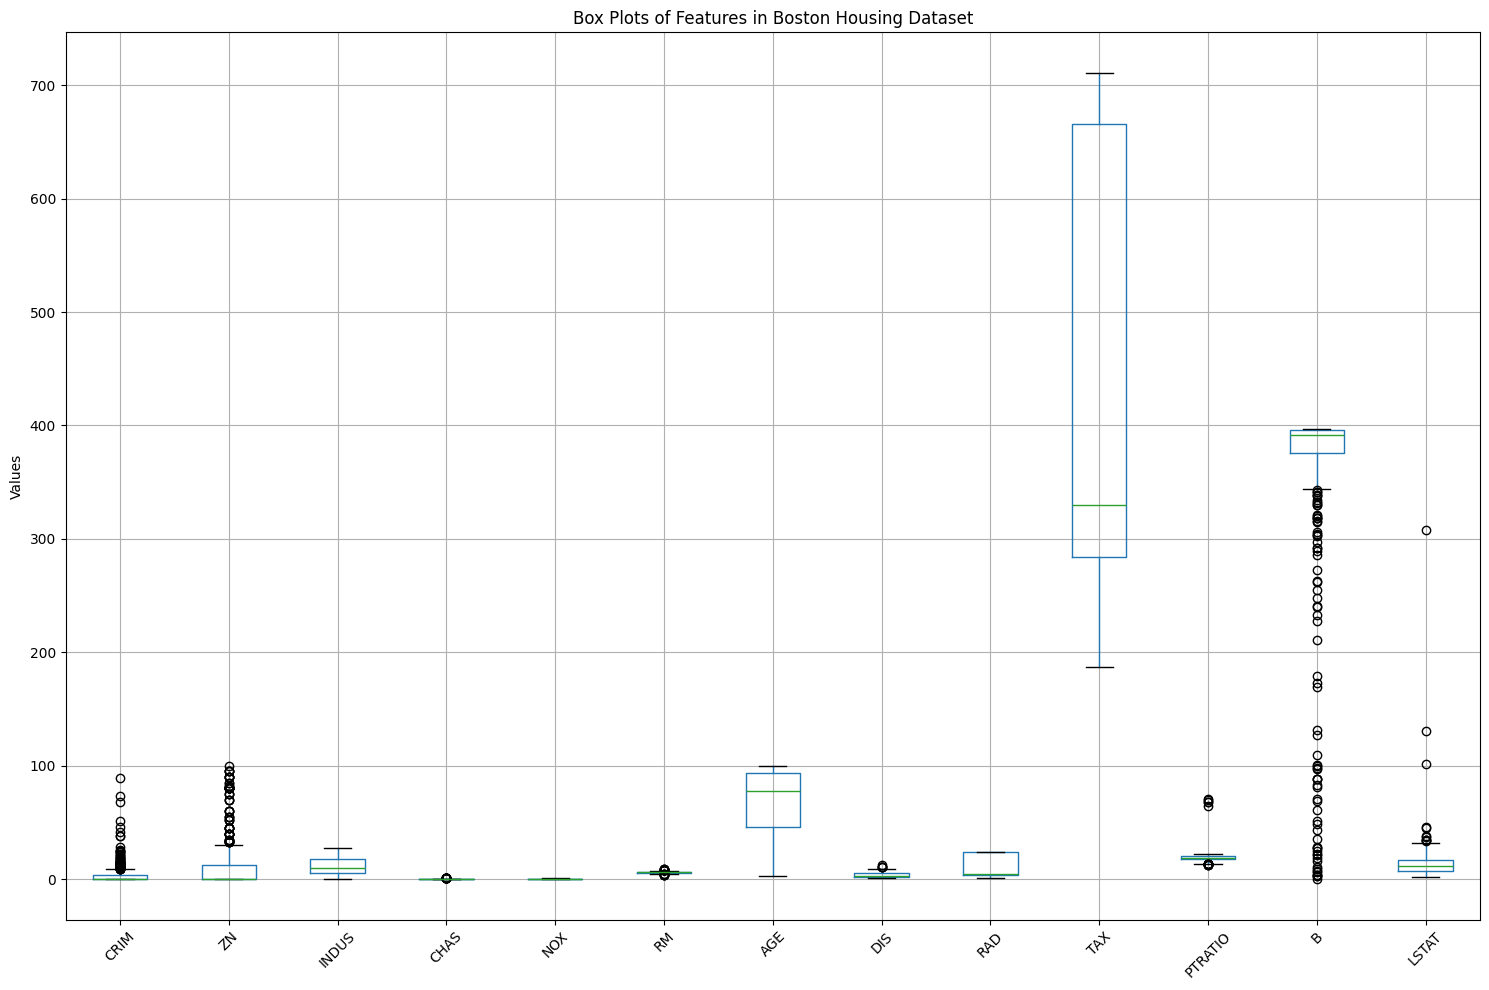

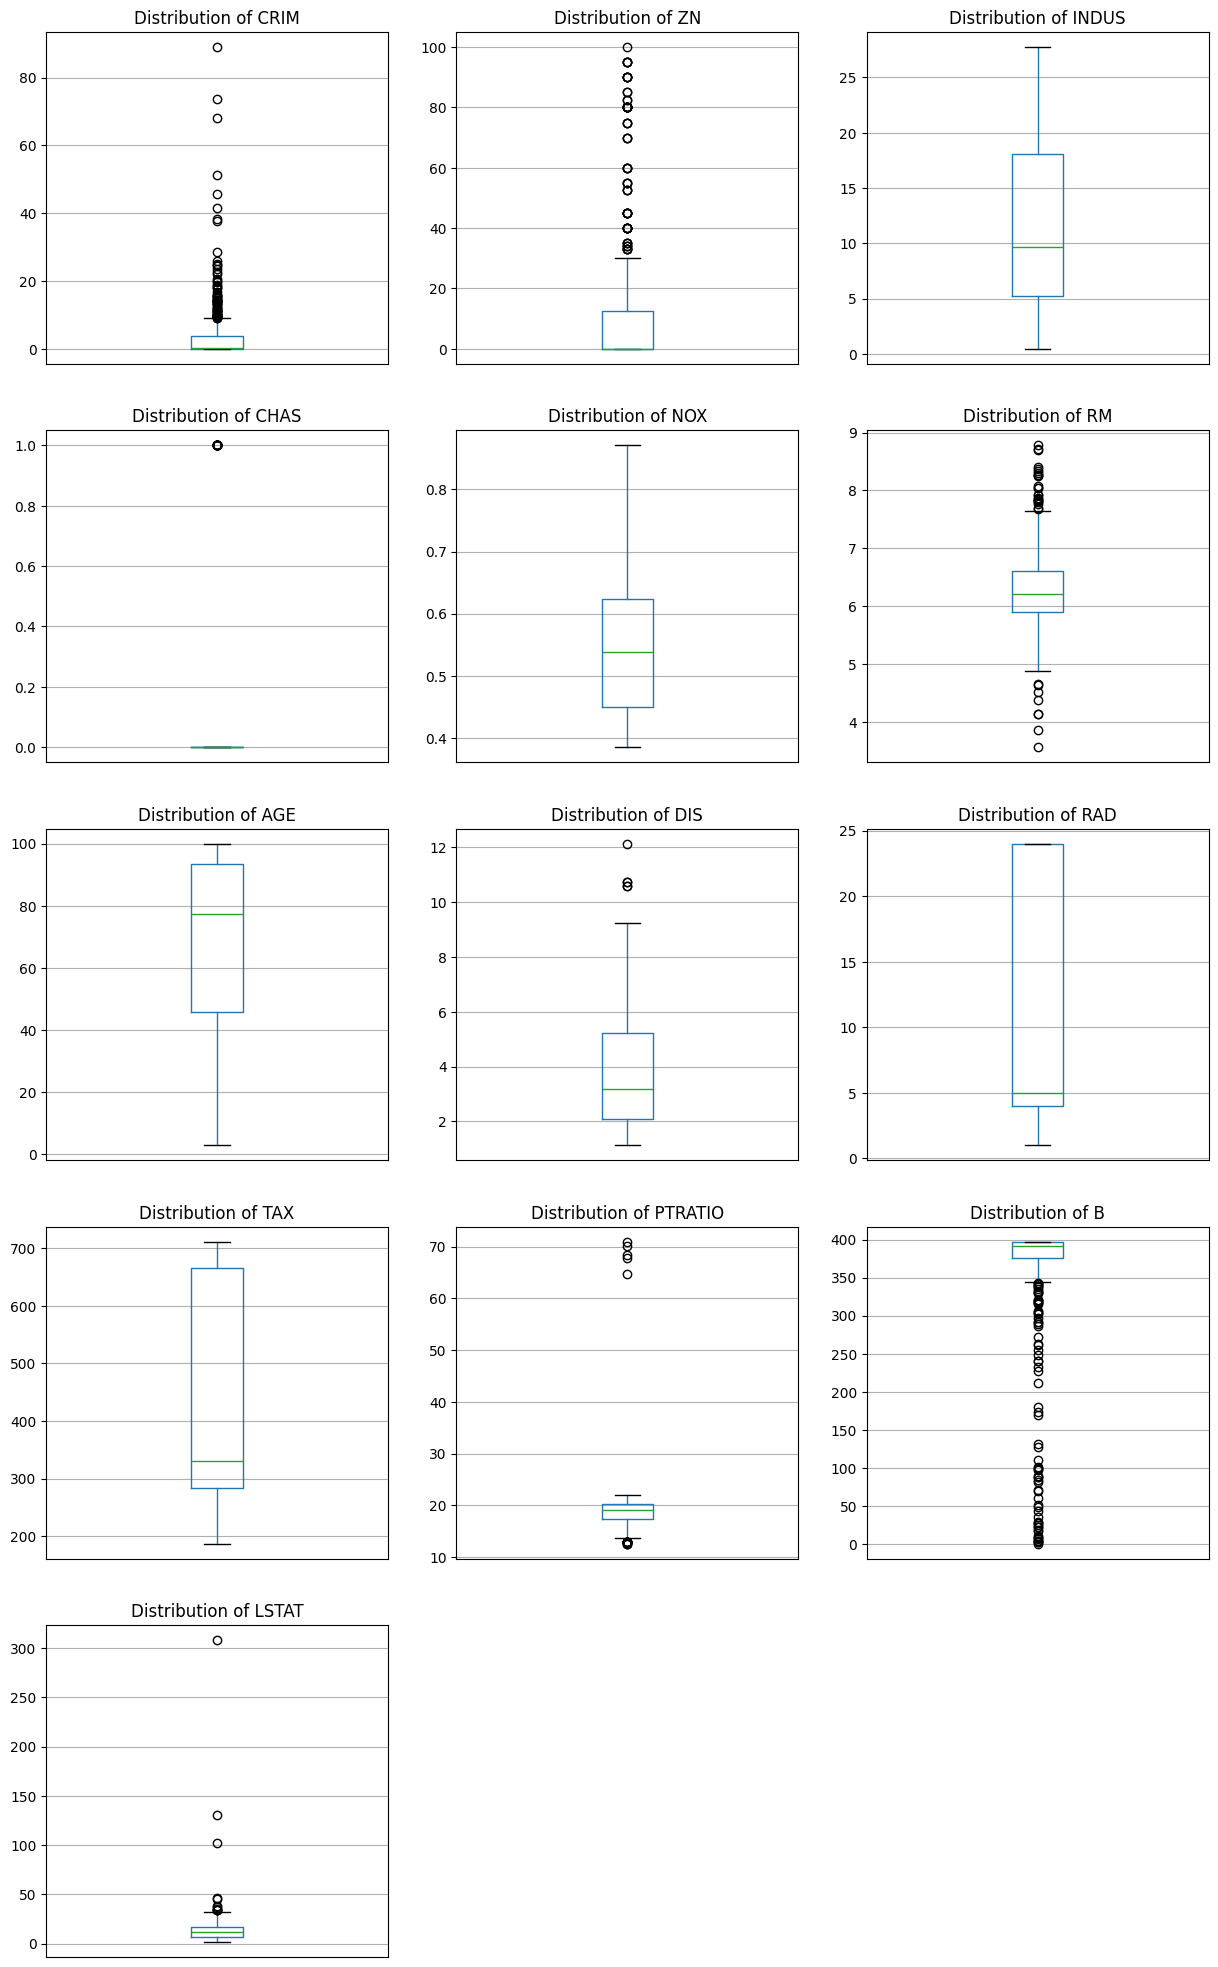

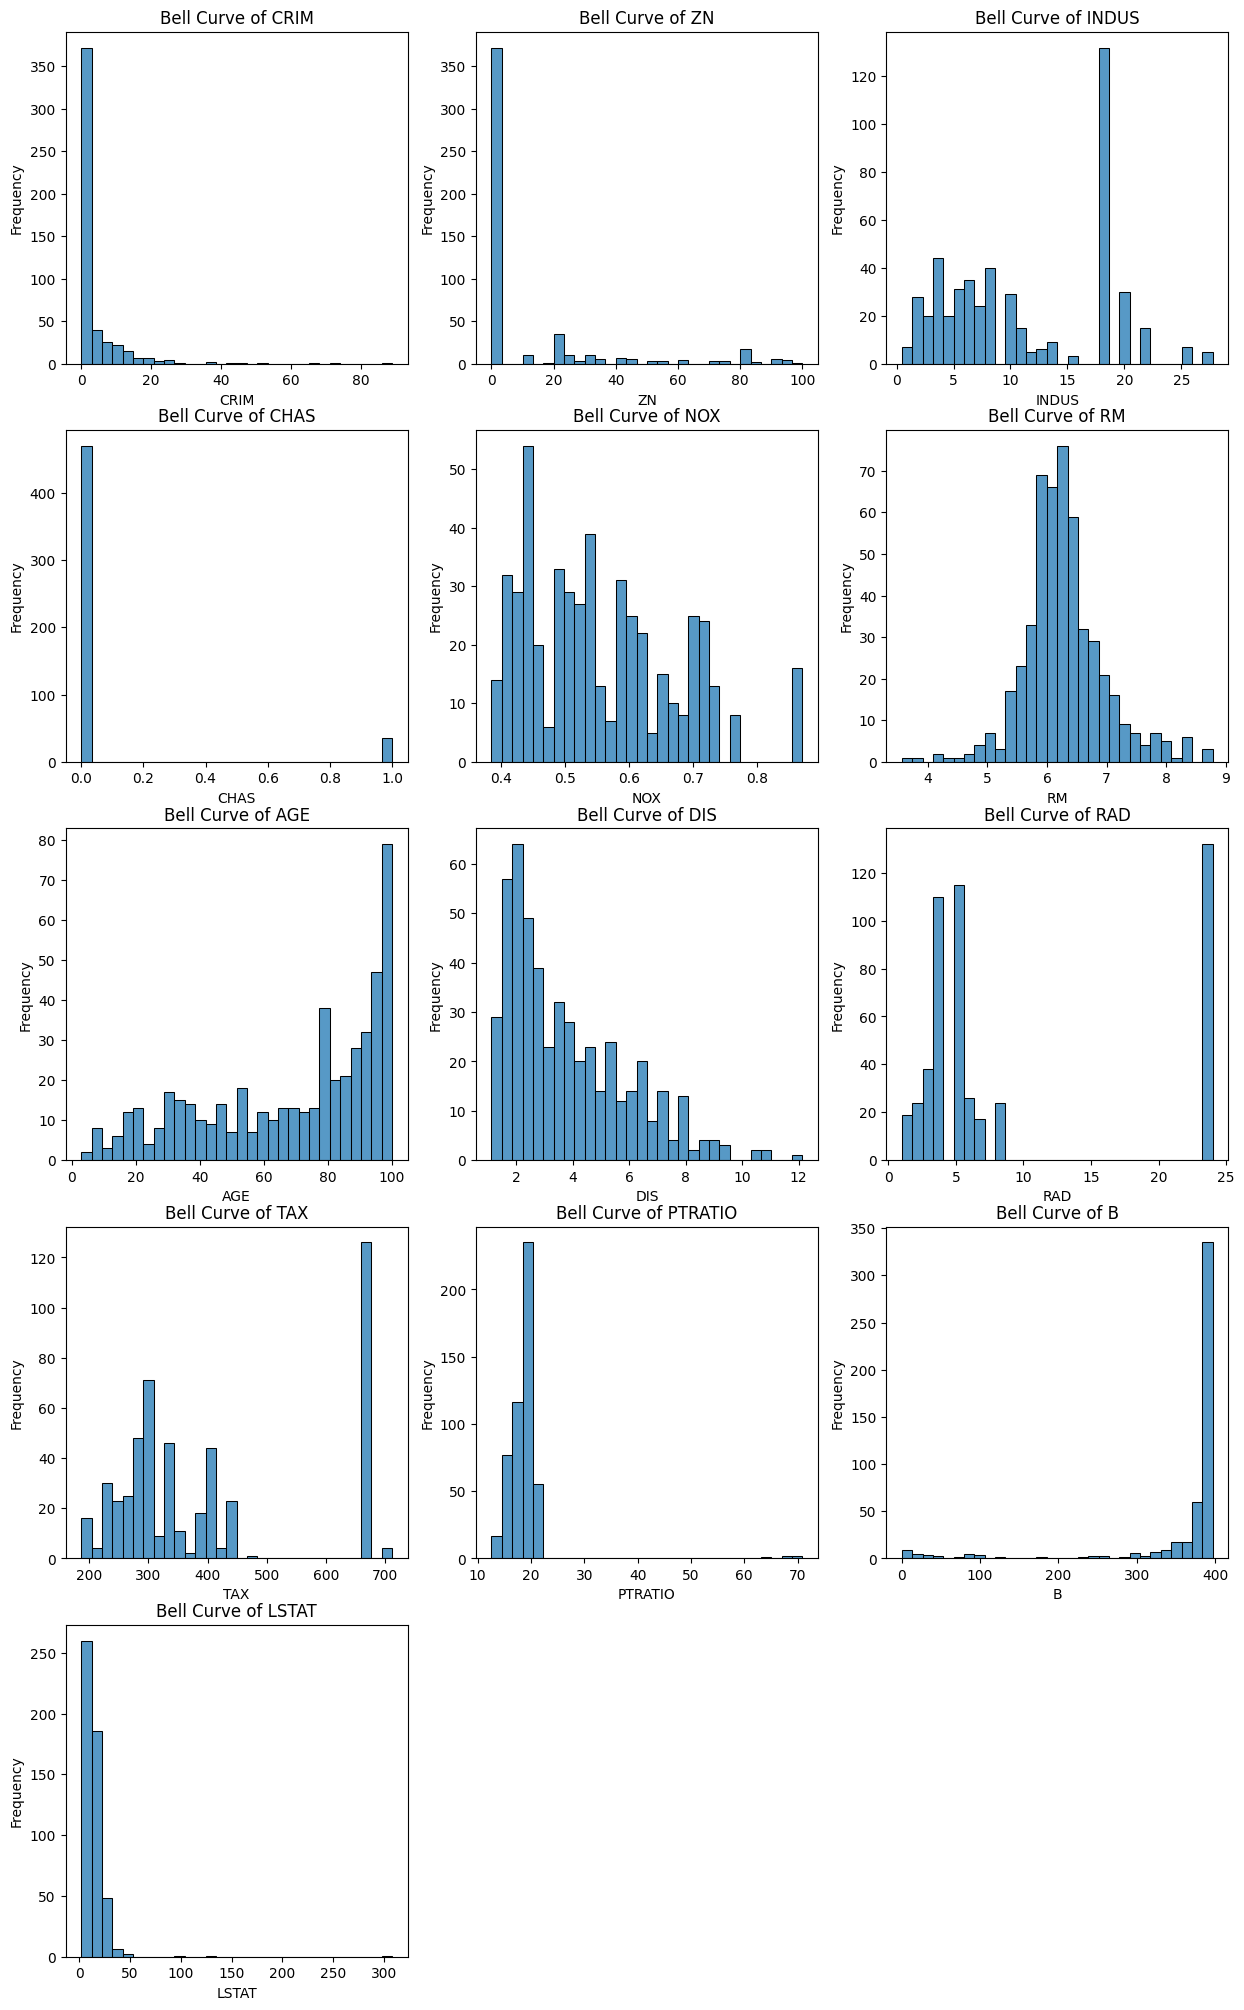

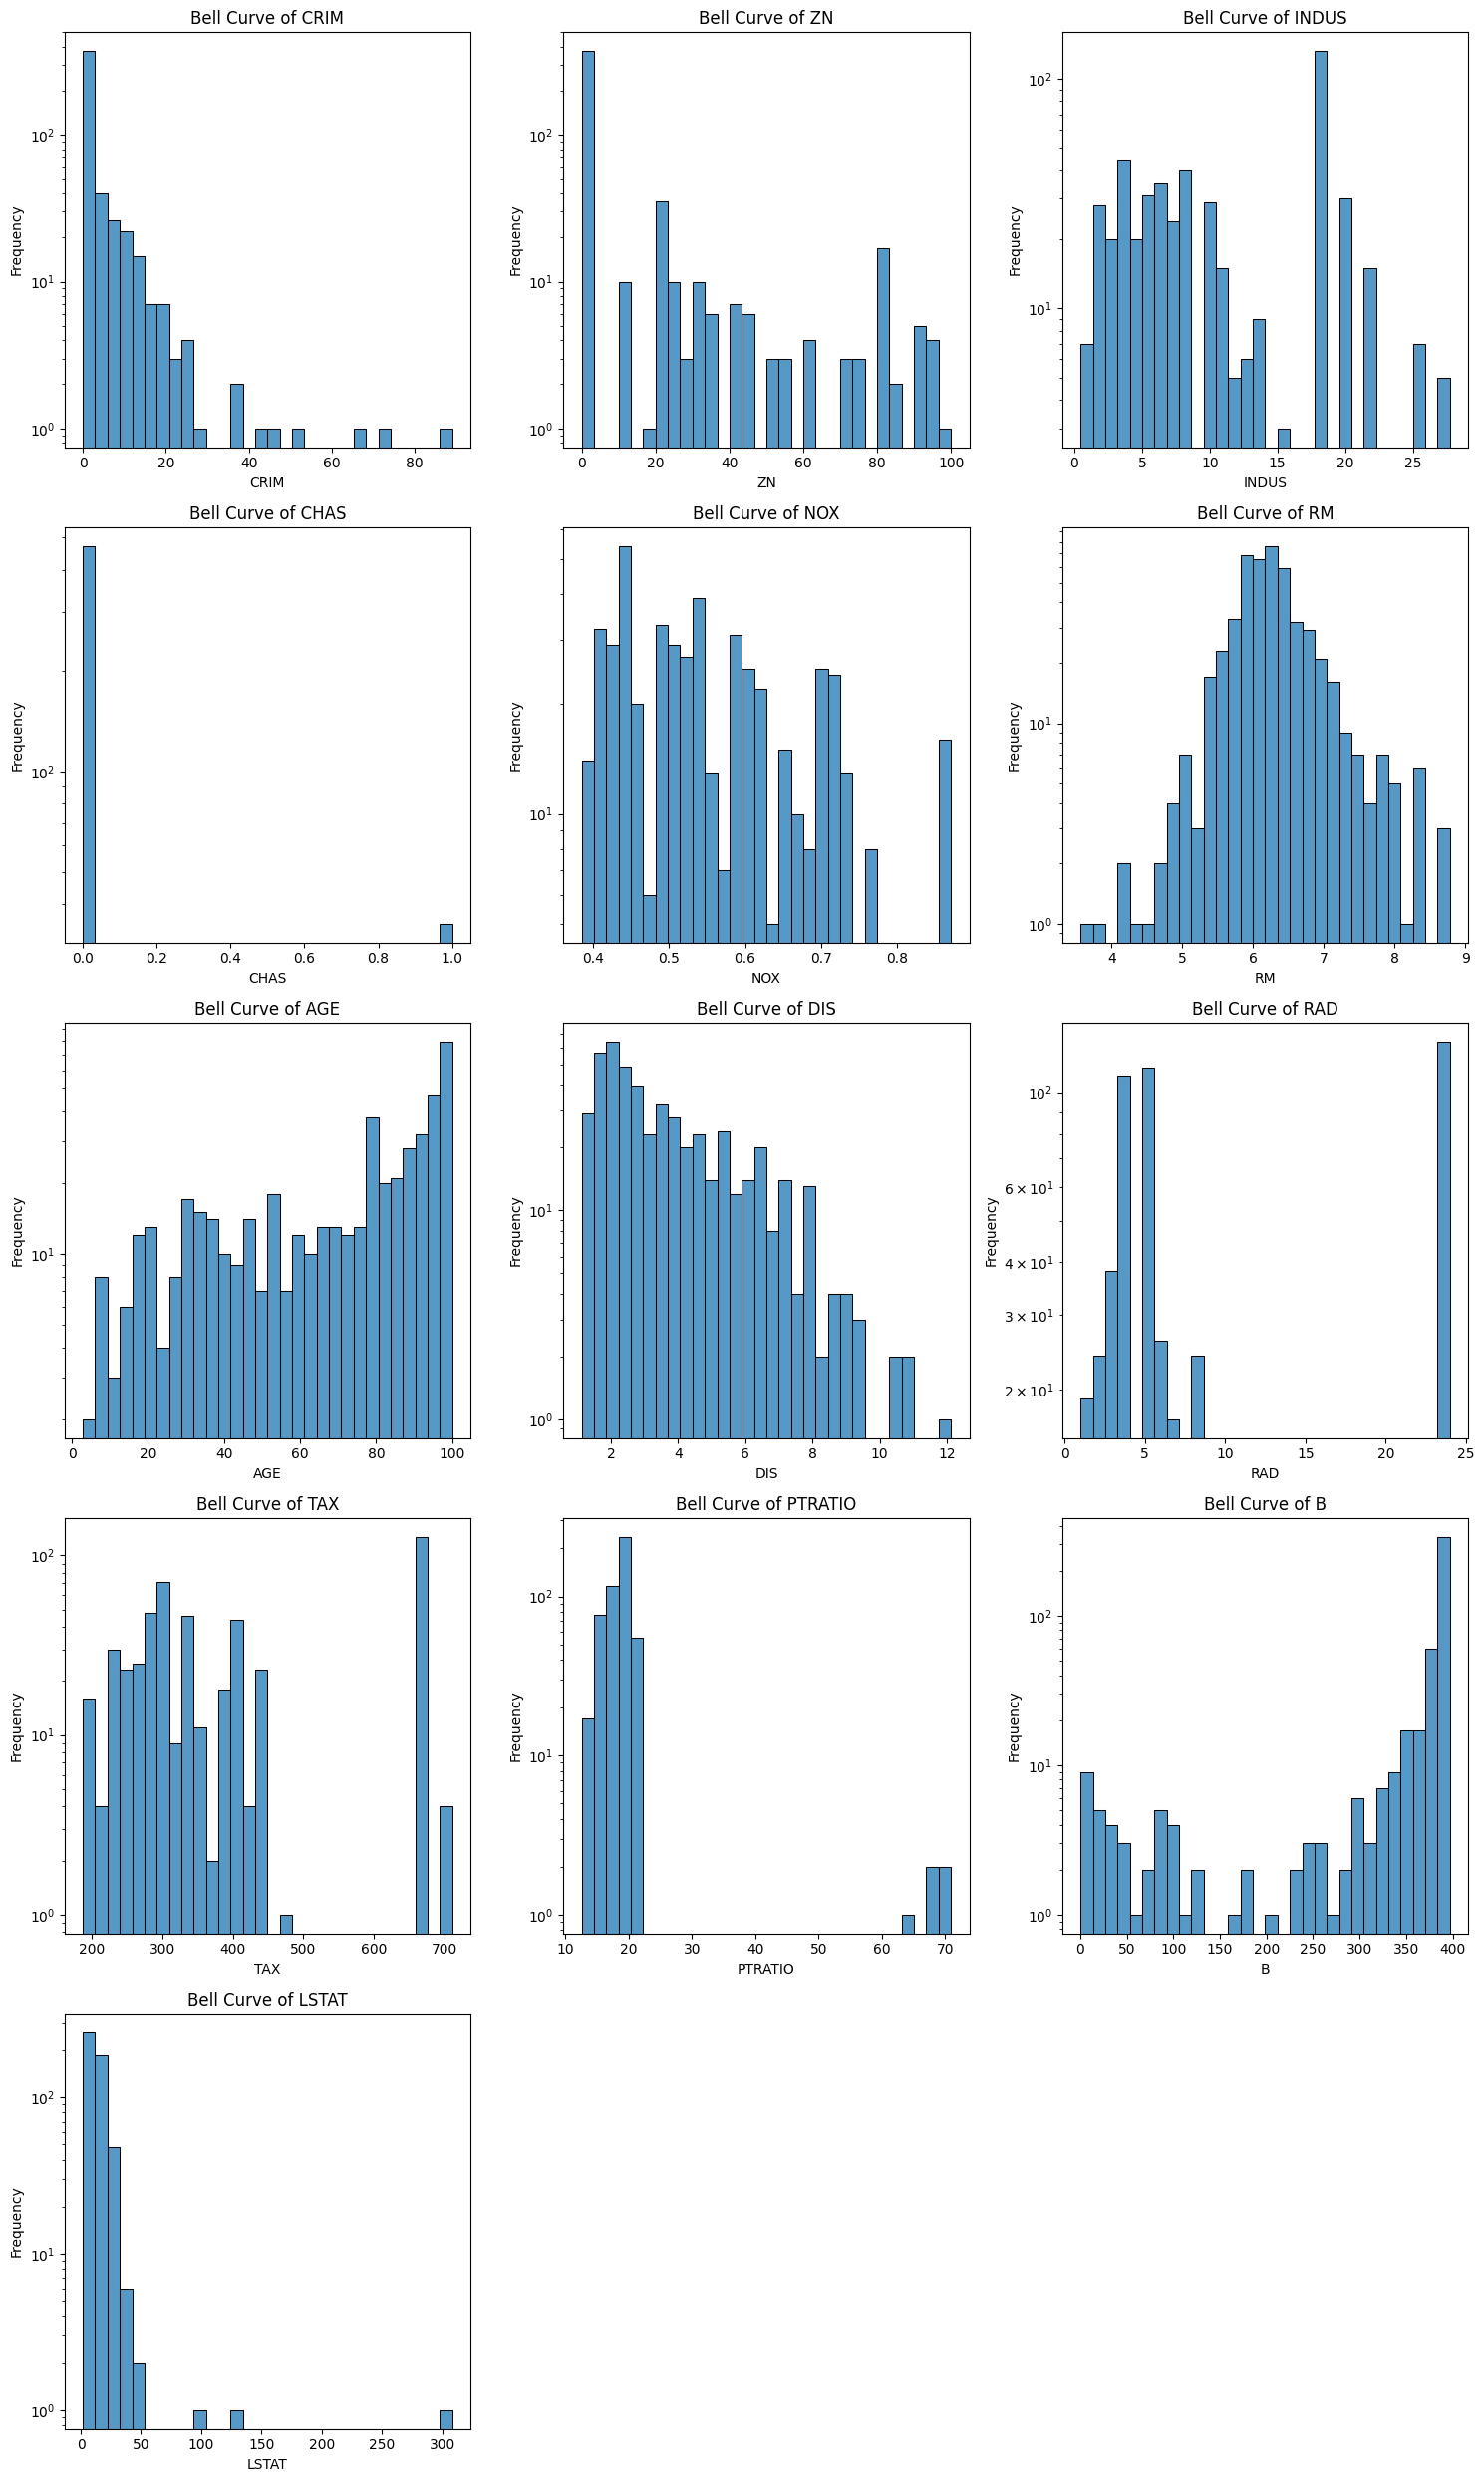

In [92]:
# First plot - overall boxplot
plt.figure(figsize=(15, 10))
df.boxplot(column=[col for col in df.columns if col != 'MEDV'])
plt.xticks(rotation=45)
plt.title('Box Plots of Features in Boston Housing Dataset')
plt.ylabel('Values')
plt.tight_layout()
plt.show()

# Calculate number of rows needed based on number of features
features = [col for col in df.columns if col != 'MEDV']
n_rows = (len(features) + 2) // 3  # Ceiling division to get number of rows needed for 3 columns

# Second plot - individual boxplots
plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, 3, i)
    df.boxplot(column=[feature])
    plt.title(f'Distribution of {feature}')
    plt.xticks([])  # Remove x-axis labels since we only have one feature per plot

# Third plot - individual bell curves
plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, 3, i)
    sns.histplot(df[feature], kde=False, bins=30)
    plt.title(f'Bell Curve of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Third plot - individual bell curves
plt.figure(figsize=(15, 5*n_rows))
for i, feature in enumerate(features, 1):
    plt.subplot(n_rows, 3, i)
    sns.histplot(df[feature], kde=False, bins=30)
    plt.title(f'Bell Curve of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.yscale('log')
    
plt.tight_layout()
plt.show()



## 2.2: Define what could be outliers
In the previous task, you identified potential outliers through visual exploration — several features showed individual data points that lie far from the main distribution.

However, visual inspection alone isn't always enough. In this task, you’ll take a more formal approach by considering statistical methods for defining and detecting outliers. Answer following questions:

1. How can we define an outlier in a way that is measurable?
- A common definition for outlier is IQR, in which an outlier is a value that lies more than 1.5 * IQR above the third quartile (Q3) or below the first quartile (Q1).
- Please give your own definition of an outlier and explain your reasoning.

2. What method(s) can be used to detect outliers in numerical features? Choose one method you find appropriate and use it in your code to detect outliers in at least one numerical feature.


#### answers

The IQR method would describe an outlier as a value which is multiple times outside the bounds of the first and third quartile. In a general sense outliers are data points which do not seem to follow the typical trends in the rest of the dataset

For the crime rate in particular there is a heavy negative skew where the majority of neighborhoods have very few crimes, and there seems to be an exponential fall off for the frequency of high crime neighborhoods but this is important data to include. the IQR method therefore sets an upper bound which is so low that it does not capture important high crime data points. To compensate for this, we square the crime data giving increased weight to high crime datapoints, then apply the quantile

There are several other methods for detecting outliers including, IQR,  Z-scores (distance from the median) or percentile capping.

Feature that will be analyzed CRIM
Q1: 0.08221
Q3: 3.67822
Lower bound: -5.3118
Typical Upper bound:  9.0722
Lower bound: -20.2771
Typical Upper bound:  33.8131


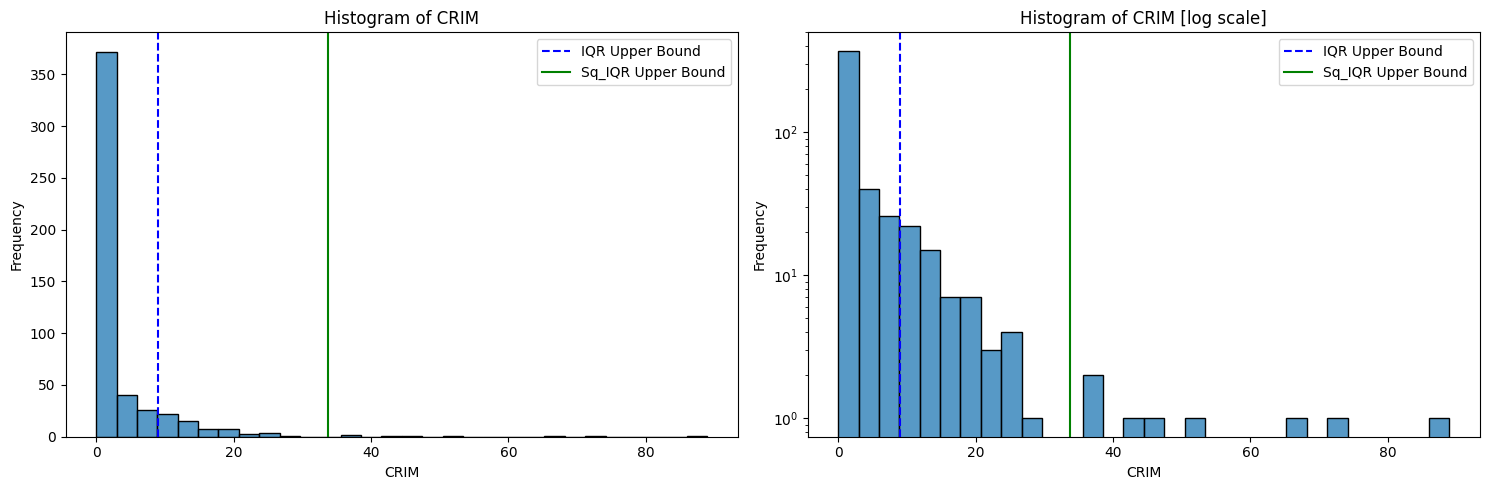

In [93]:
# Your solution goes here
# Calculate Q1 (25th percentile)

feature = 'CRIM'
print(f"Feature that will be analyzed {feature}")

# IQR METHOD
fdata = df[feature]

# IQR METHOD
Q1 = fdata.quantile(0.25)
# Calculate Q3 (75th percentile)
Q3 = fdata.quantile(0.75)
# Calculate IQR
IQR = Q3 - Q1
iqr_lower_bound = Q1 - 1.5 * IQR
iqr_upper_bound = Q3 + 1.5 * IQR


# LOG IQR METHOD
sq_fdata = fdata**2
sq_Q1 = sq_fdata.quantile(0.25)
# Calculate Q3 (75th percentile)
sq_Q3 = sq_fdata.quantile(0.75)
# Calculate IQR
sq_IQR = sq_Q3 - sq_Q1
sq_iqr_lower_bound = sq_Q1 - 1.5 * sq_IQR
sq_iqr_upper_bound = sq_Q3 + 1.5 * sq_IQR


print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"Lower bound: {iqr_lower_bound: .4f}")
print(f"Typical Upper bound: {iqr_upper_bound: .4f}")

print(f"Lower bound: {sq_iqr_lower_bound: .4f}")
print(f"Typical Upper bound: {sq_iqr_upper_bound: .4f}")

# Create subplots for CRIM
plt.figure(figsize=(15, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['CRIM'], bins=30, kde=False)
plt.axvline(x=iqr_upper_bound, color='blue', linestyle='--', label='IQR Upper Bound')
plt.axvline(x=sq_iqr_upper_bound, color='green', linestyle='-', label='Sq_IQR Upper Bound')
plt.legend()
plt.title('Histogram of CRIM')
plt.xlabel('CRIM')
plt.ylabel('Frequency')


# Histogram on log scale
plt.subplot(1, 2, 2)
sns.histplot(df['CRIM'], bins=30, kde=False)
plt.axvline(x=iqr_upper_bound, color='blue', linestyle='--', label='IQR Upper Bound')
plt.axvline(x=sq_iqr_upper_bound, color='green', linestyle='-', label='Sq_IQR Upper Bound')
plt.title('Histogram of CRIM [log scale]')
plt.xlabel('CRIM')
plt.ylabel('Frequency')
plt.yscale('log')
plt.legend()

plt.tight_layout()
plt.show()



## 2.3: Address outliers

In the previous task, you detected several outliers across different features. Now, it’s time to decide what to do about them.

Outliers aren't always errors — they may represent rare but valid observations, or they may be mistakes or anomalies that distort the analysis. In this task, you’ll define and apply a strategy to handle them based on your understanding of the data.

Explore and answer the following questions:
- Are the outliers data entry errors or real, rare values?
- Should you remove, transform, cap, or flag them?
- How might your decision affect your model?


#### answers

1: We are dealing with housing data, which leads to the assumption that the values are real. Nonetheless, its a good practice to apply common sense to the values in the particular feature. If we are dealing with the CRIM feature - Per capita crime rate, it is safe to assume that this might be plausable.
The same goes for the feature B - population of African Americans as we would likely refer to it today. The fact the data set refers to these people as blacks might indicate that this data is from the past. Leading to an assumption that it was time of greater segregation

2: The upper bound for Crime identified in the previous step (~35) signifies a threshold where neighborhoods are very dangerous.
      Beyond that threshold crime is an overwhelming feature and your willingness to live there is always negative so we could flag such outliers as very dangerous, but leave the values as is

3: Capping it might lead to under-representation and missbehavior of the final model.

# Task 3: Visualize how features are related

Let’s explore how different features (columns) relate to each other, especially to housing prices.


*   Look at the column descriptions. Which features do you think are most closely related to housing prices? Explain your reasoning in a few sentences.
*   Choose a way to visualize the correlation between all the features. Which features have a strong correlation with housing price?
Did this match what you expected?
*   Besides the housing price, are there any other features that are strongly correlated with each other? If yes, do you think you need both of them in your model? Or could you keep just one, or combine them? Use the column descriptions to support your answer.




### IMPORTANT
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940 - older neighborhoods may be run down and out of date and have lower value than new
- LSTAT - % lower status of the population - This might refer to poorer neighborhoods and lower home prices
- TAX - full-value property-tax rate per $10,000 - high tax probably correlates with high home prices (if residential area)

### Maybe Imporant
- CRIM - per capita crime rate by town - 
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft. - push up because these are nice big houses
- INDUS - proportion of non-retail business acres per town. - pushes down because of the polution from industry
- NOX - nitric oxides concentration (parts per 10 million) - pushes down because this relates to the distance from busy streets
- PTRATIO - pupil-teacher ratio by town

### Probably not important
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- MEDV - Median value of owner-occupied homes in $1000's


### 2
Through visual inspection of the scatter plots and the correlation matrix, the highly correlated options did not match our expectation.
It seems that INDUS, NOX, RM and TAX seem to have the strongest correlations with the median value.

### 3
 TAX and RAD are very highly correlated (.89). This is plausibly because accessiblity to such highways allows you to live outside the city center which is common for workers which commute from nice neighborhoods with large homes into the city. Alternatively large industrial areas need access to the city via radial roads. Both these typologies pay large taxes. 
It might make sense to combine these into a single feature.
Furthermore, there is high negative correlation between DIS - NOX and INDUS (-0.71 and -0.77). This is because the the emoloyment centers have been historically close to industrial areas which also produces a lot of polution. The last correlation is obvious one - INDUS and NOX - industrial centers often correlate with higher polution.

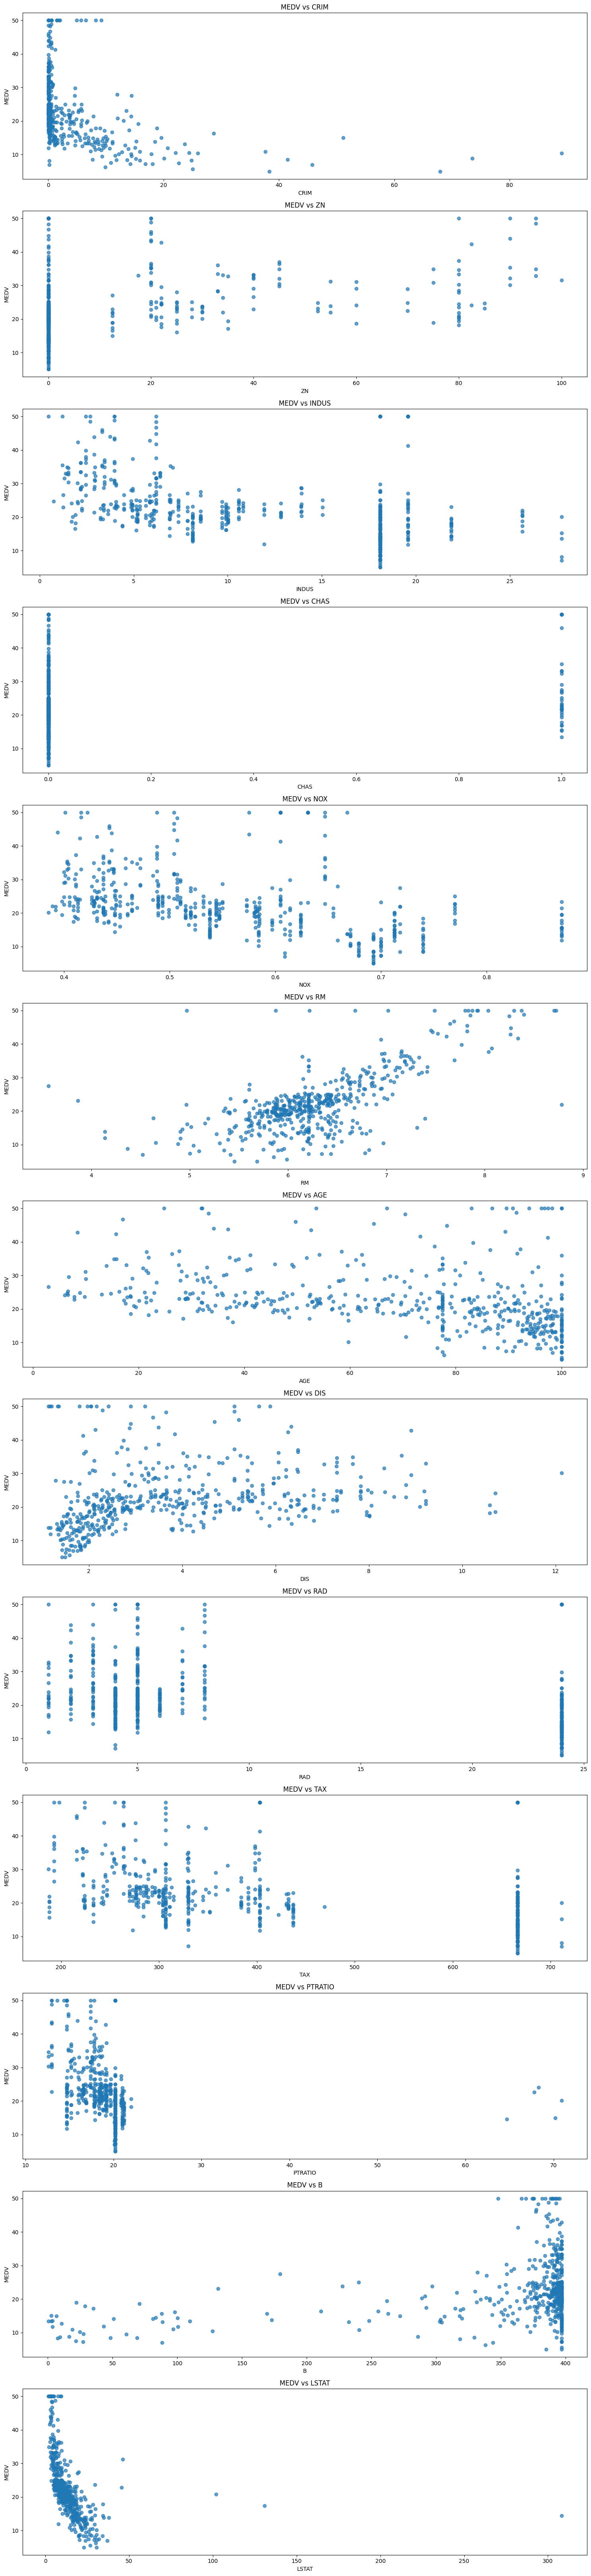

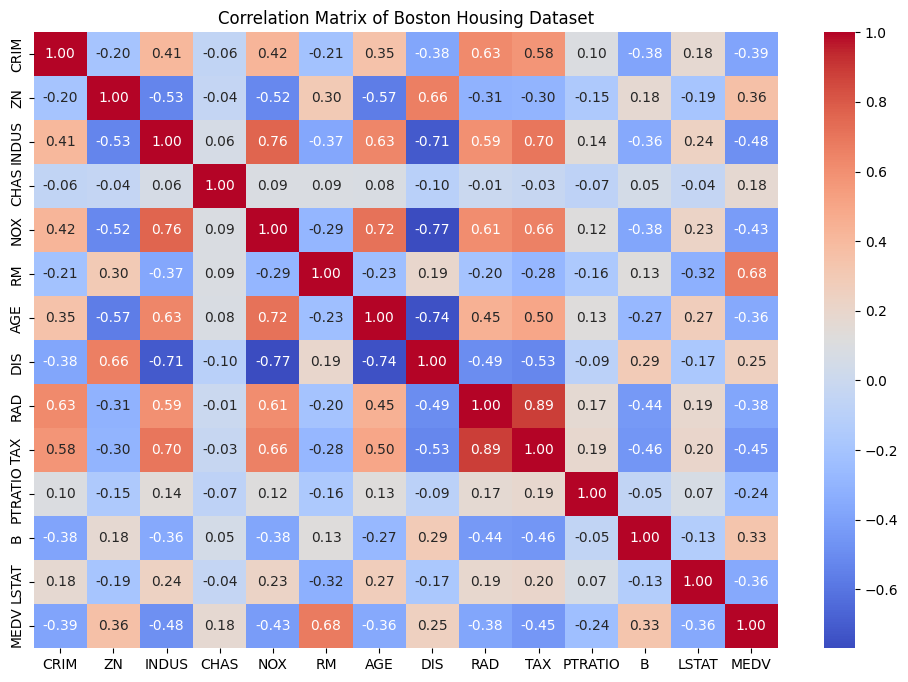

In [94]:
# Your solution goes here

# Plotting price (MEDV) against every other feature
plt.figure(figsize=(15, 5 * len(features)))

for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    plt.scatter(df[feature], df['MEDV'], alpha=0.7)
    plt.title(f'MEDV vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('MEDV')

plt.tight_layout()
plt.show()


# Constructing a correlation matrix for the dataframe
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Boston Housing Dataset")
plt.show()